In [1]:
'''
    Author: Lim-Sylvie Pou
    Python Version: 2.7
'''

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Part I : Import the data

In [2]:
# Definition of the datapaths : 
traindata_path = './us_census_full/census_income_learn.csv'
testdata_path = './us_census_full/census_income_test.csv'

In [3]:
trainset = pd.read_csv(traindata_path, sep=',', skiprows=2, header=None, index_col=False)
testset = pd.read_csv(testdata_path, sep=',', skiprows=2, header=None, index_col=False)

In [4]:
trainset.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
1,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
2,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
4,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [5]:
trainset.shape, testset.shape

((199521, 42), (99760, 42))

In [6]:
# Naming the columns :
columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', \
                    'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT',\
                    'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX',     \
                    'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN',    \
                    'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR',    \
                    'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'WAGE']

trainset.columns = columns
testset.columns = columns

In [7]:
trainset.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,WAGE
0,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
1,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
2,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
4,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [8]:
print 'There are %d observations in the trainset for %d variables.' %(trainset.shape[0], trainset.shape[1])

There are 199521 observations in the trainset for 42 variables.


In [9]:
# The attribute 'Instance Weight' should not be used in the classifiers so we can drop the columns from the sets :
trainset.drop(['MARSUPWT'], axis=1, inplace=True)
testset.drop(['MARSUPWT'], axis=1, inplace=True)

In [10]:
print 'There are %d observations in the trainset for %d variables.' %(trainset.shape[0], trainset.shape[1])

There are 199521 observations in the trainset for 41 variables.


#### Probability for both labels
Let's see the proportion of persons making more than 50.000 \$ and the other category.

In [11]:
count = trainset['WAGE'].value_counts()
for i in range(len(count)) :
    print 'There are %.2f%% of people making %s$ in the trainset.' %(float(count[i])*100/len(trainset), count.keys()[i])

There are 93.79% of people making  - 50000.$ in the trainset.
There are 6.21% of people making  50000+.$ in the trainset.


In [12]:
count = testset['WAGE'].value_counts()
for i in range(len(count)) :
    print 'There are %.2f%% of people making %s$ in the testset.' %(float(count[i])*100/len(testset), count.keys()[i])

There are 93.80% of people making  - 50000.$ in the testset.
There are 6.20% of people making  50000+.$ in the testset.


The trainset is highly unbalanced. A model will then be more likely to predict - 50000.$ since it is correct in 93% of cases. However, removing samples from the majority class may cause the classifier to miss important features pertaining to the majority class.

We will keep the datasets that way but instead of only using the accuracy as a metric, we are going to specific metrics

# Part II :  Data discovery

Let's take a look at the statistics of the two categories of people we are interested in. Since we have continuous variables and categorical variables, the next analysis will only focus on the continuous variables. Then, we will look at the distribution of the categorical variables.

In [13]:
trainset.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGMTR1     object
MIGMTR3     object
MIGMTR4     object
MIGSAME     object
MIGSUN      object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
YEAR         int64
WAGE        object
dtype: object

In [14]:
trainset.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000,199521.000000
mean,34.493888,15.352454,11.306499,55.427464,434.723347,37.314162,197.531513,1.956195,0.175440,1.514828,23.174869,94.499672
std,22.310778,18.067169,14.454165,274.897776,4697.554622,271.897765,1984.173504,2.365132,0.553697,0.851476,24.411470,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


When looking at the feature AHRSPAY, we can see that the maximum value is 9999 \$ per hour with a mean of 55 \$ per hour. Since it seems absurd, we can first look at the mean for all employed person.

In [15]:
trainset[trainset['WKSWORK'][:] != 0].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000,103539.000000
mean,38.604159,28.527357,20.829629,105.093820,761.275906,62.371242,220.661924,3.769613,0.338076,1.992100,44.658274,94.500961
std,13.449020,15.201886,13.587244,372.613221,6293.111322,344.336651,2146.834763,1.985830,0.731986,0.088533,13.745168,0.500001
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,94.000000
25%,28.000000,18.000000,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,44.000000,94.000000
50%,37.000000,33.000000,23.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
75%,48.000000,41.000000,33.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4356.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


For all employees, they make on average 105 \$ per hour. This result seems absurd, we would be tempted to remove this feature from our datasets during the machine learning prediction models.

## Part II.1 : Analyze nominal variables

### Statistics on people who have an annual wage under 50.000 dollars

In [16]:
trainset[trainset['WAGE'] == ' - 50000.'].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,187139.000000,187139.000000,187139.000000,187139.000000,187139.000000,187139.000000,187139.00000,187139.000000,187139.000000,187139.000000,187139.000000,187139.000000
mean,33.714977,14.440705,11.256622,53.693100,143.849550,27.004018,107.81767,1.820721,0.169676,1.483961,21.527715,94.497769
std,22.620105,17.866532,14.597634,261.169717,1815.352981,229.536277,909.77901,2.317626,0.547175,0.869723,24.118183,0.499996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,94.000000
50%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,94.000000
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.00000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9916.000000,99999.000000,4608.000000,39000.00000,6.000000,2.000000,2.000000,52.000000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111c227d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113774610>]], dtype=object)

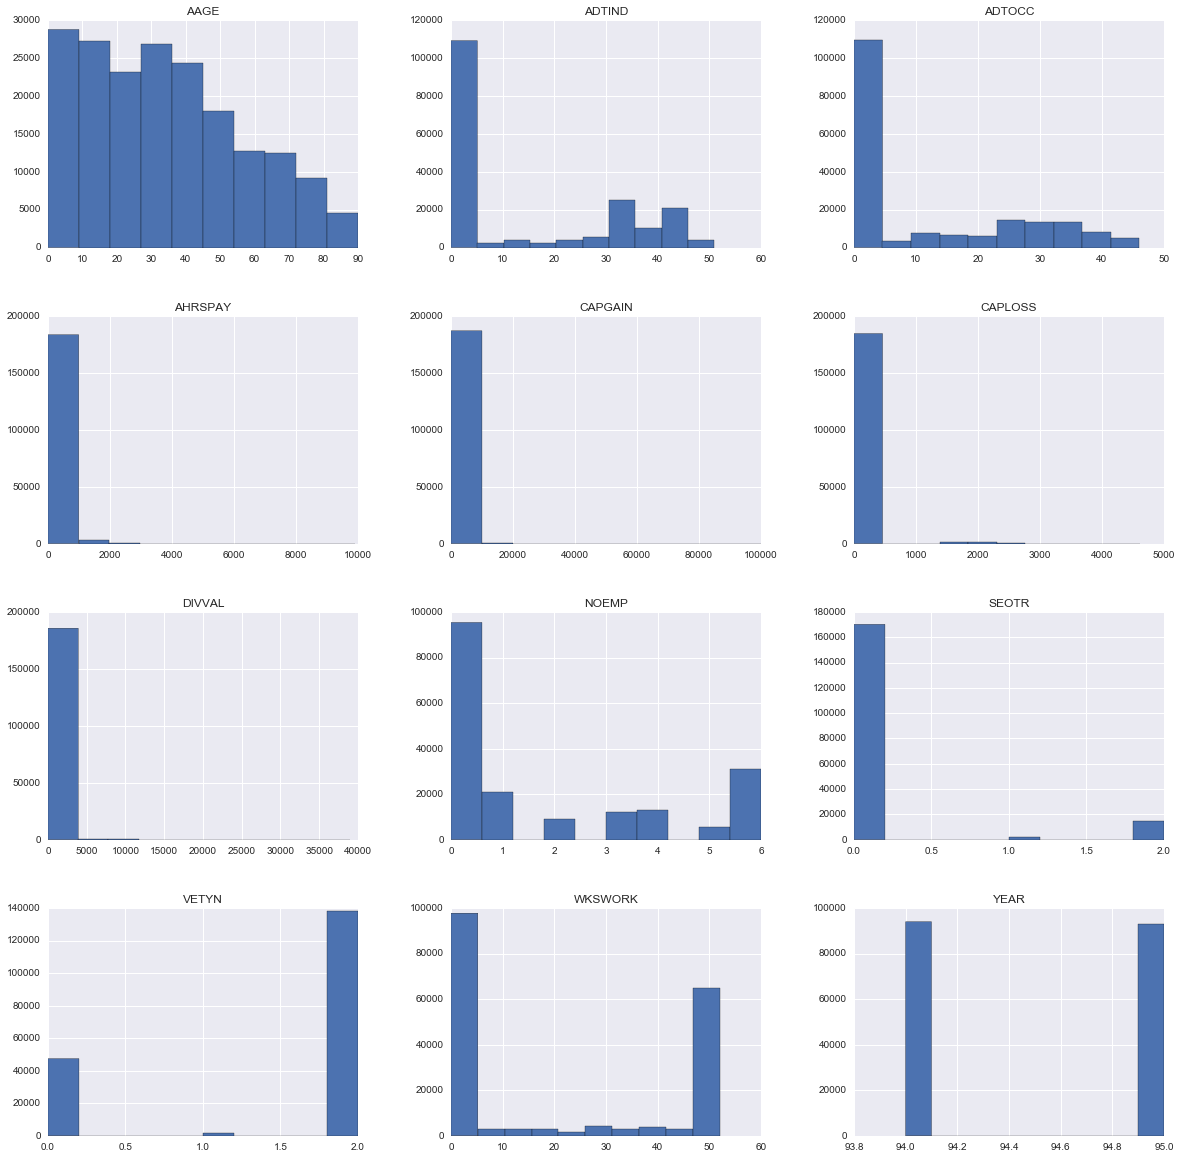

In [17]:
trainset[trainset['WAGE'] == ' - 50000.'].hist(figsize=(20,20))

### Statistics on people who have an annual wage above 50.000 dollars

In [18]:
trainset[trainset['WAGE'] == ' 50000+.'].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000
mean,46.266193,29.132450,12.060330,81.640284,4830.930060,193.139557,1553.448070,4.003715,0.262559,1.981344,48.069617,94.528428
std,11.830906,15.262802,12.055461,431.364773,16887.627002,607.542507,6998.071762,2.118183,0.637988,0.135313,12.259412,0.499211
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,38.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,52.000000,94.000000
50%,45.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
75%,53.000000,42.000000,17.000000,0.000000,0.000000,0.000000,363.000000,6.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,3683.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113983350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116096850>]], dtype=object)

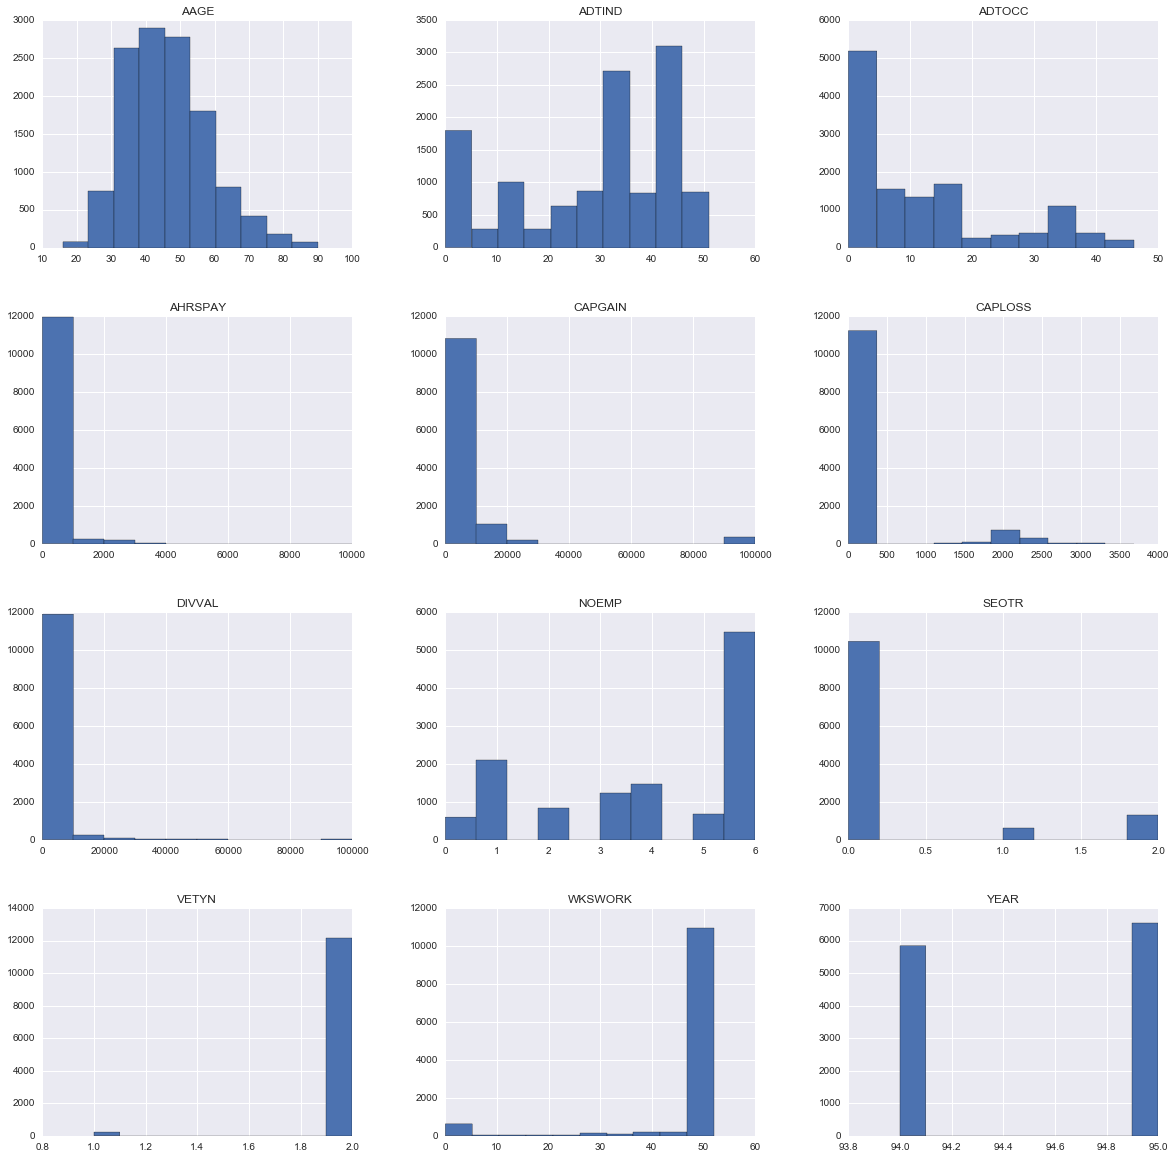

In [19]:
trainset[trainset['WAGE'] == ' 50000+.'].hist(figsize=(20,20))

Let's take a lot at some relevant features :

AAGE : We can first notice that people who have an annual wage above 50.000$ are on average older than in the other category.

VETYN : These same people also mainly have veterans benefits, with a mean of 1.98 (while classes are 0,1,2).However, in the other category, the proportion of class 2 is also important which mean that this feature might not be that relevant.

WKSWORK : This feature also shows that people who have an annual wage above 50.000$ are hard worker. Indeed, they work in average 48 weeks per year and the data are clustered closely around the mean, which brings a lot of information for our analysis. While in the other category, they work on average 22 weeks per year, but since the standard deviation is large, we do not have much information.

## Part II.2 :  Analyze categorical variables

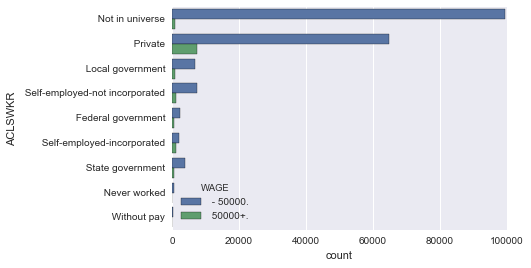

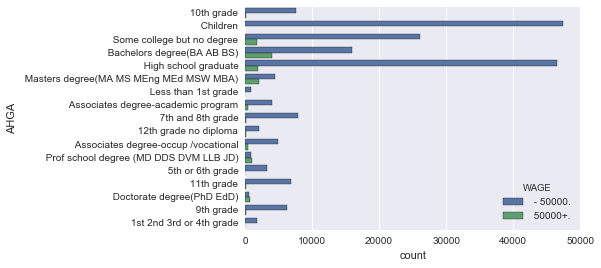

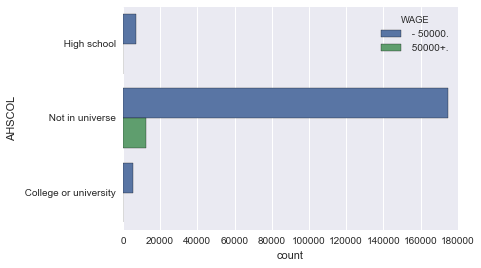

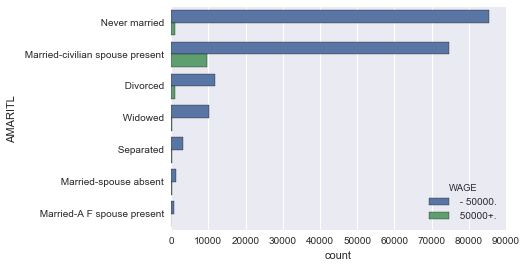

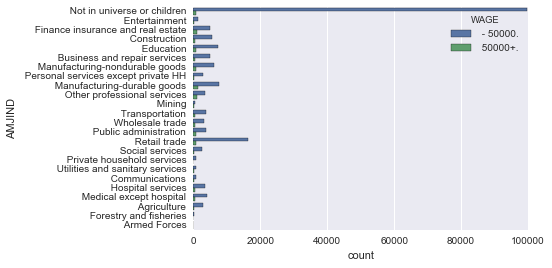

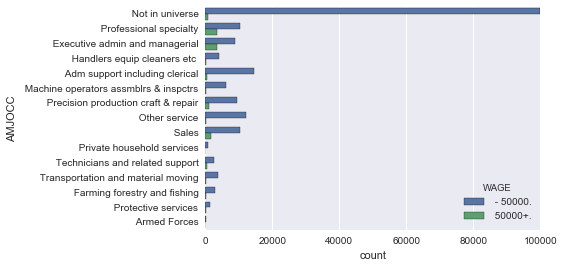

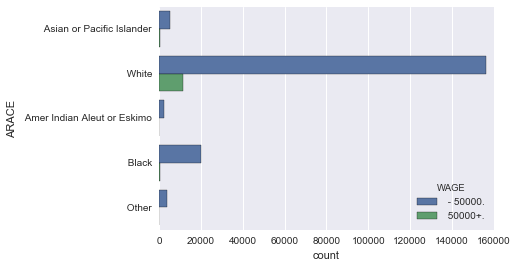

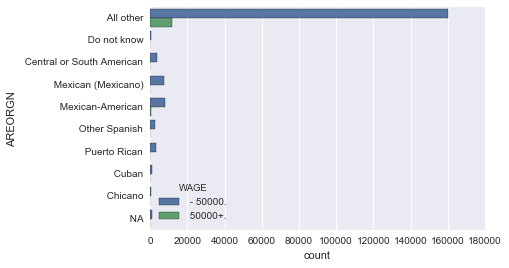

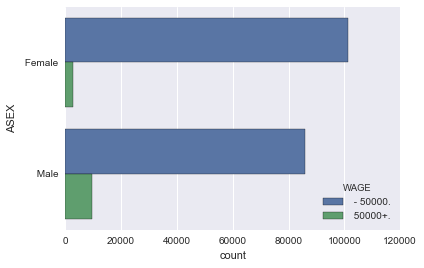

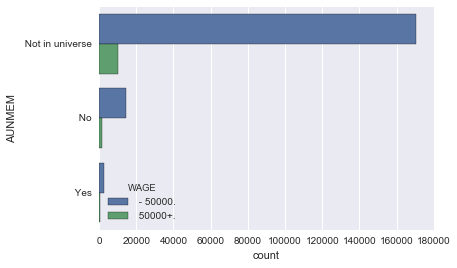

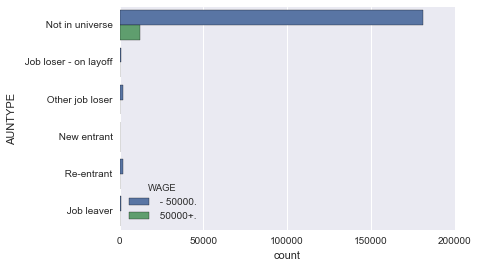

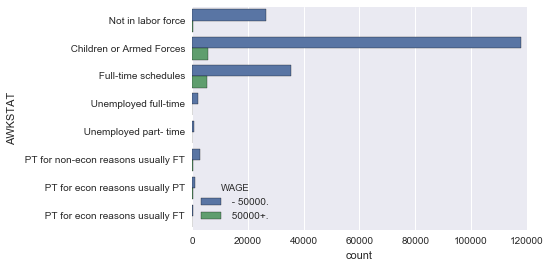

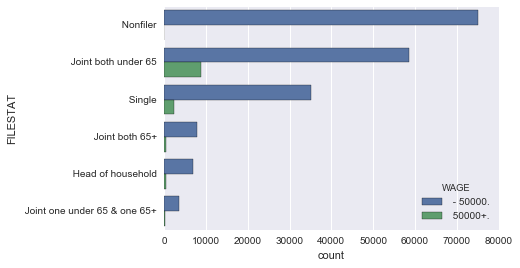

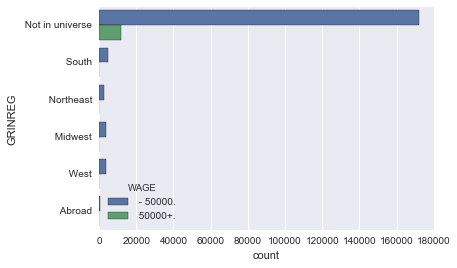

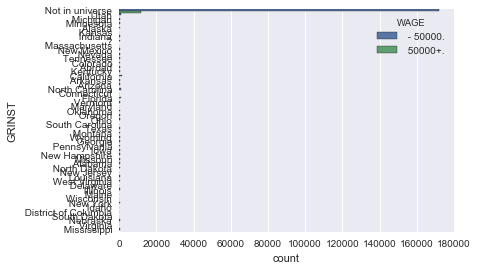

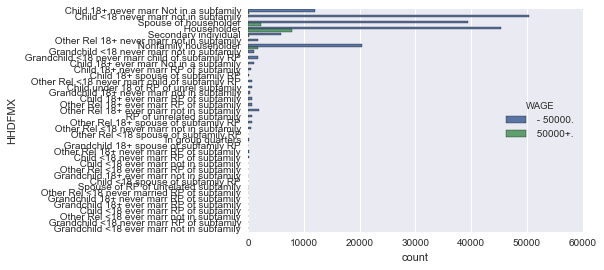

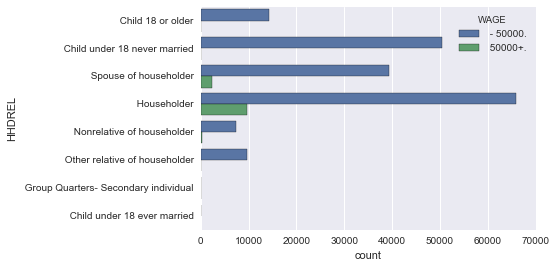

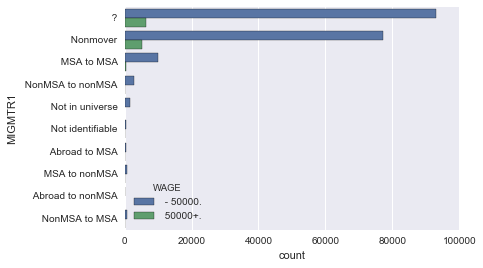

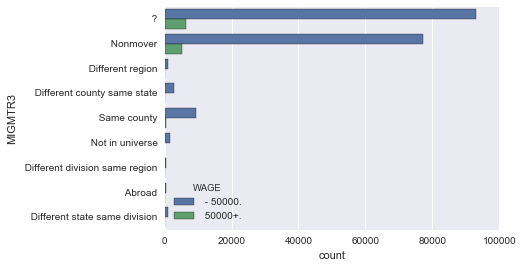

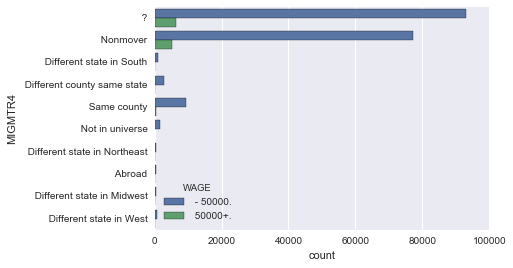

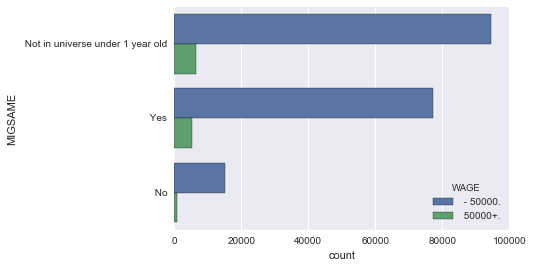

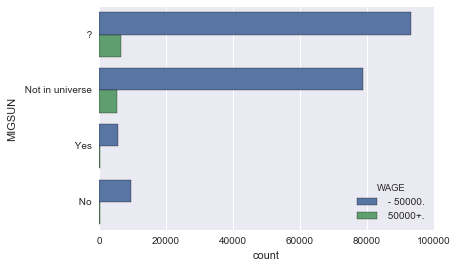

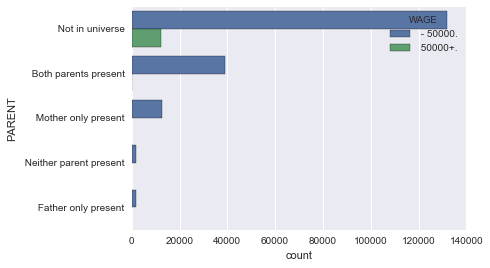

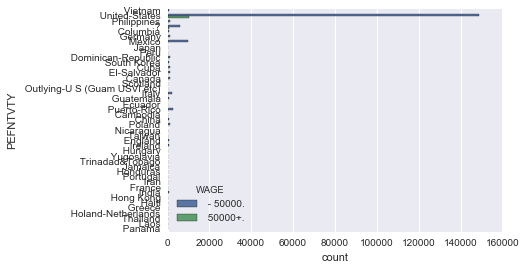

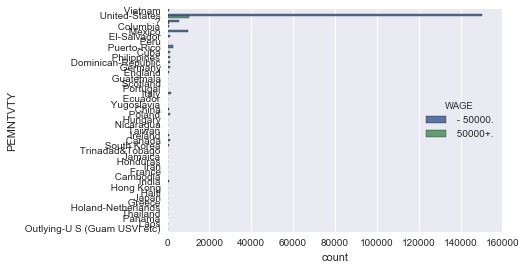

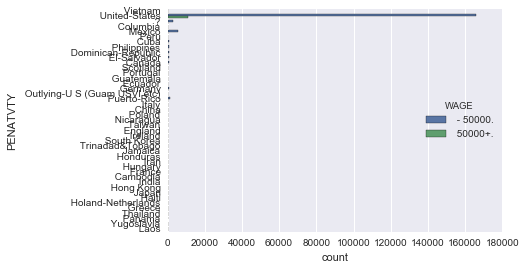

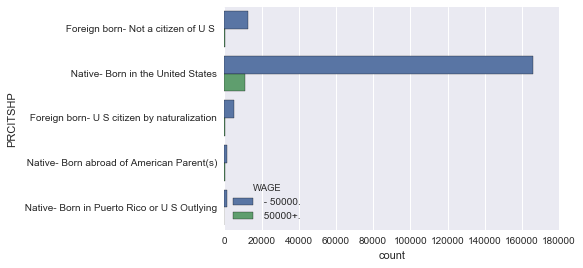

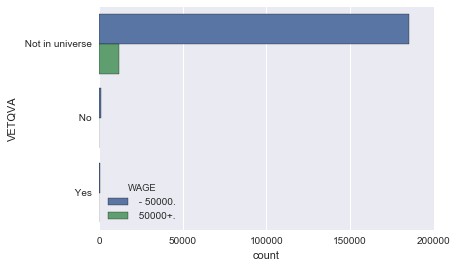

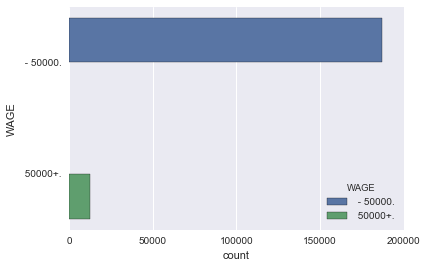

In [20]:
for col in trainset.columns :
    if trainset.dtypes[col] == 'object' :
        sns.countplot(y=col, hue='WAGE', data=trainset, )
        sns.plt.show()

We won't go through all the features but we can focus on the relevant ones.

AHGA : We can see that people with an annual wage of 50k $ went to university on average. We can also see that some classes don't earn that much, which is just explained that they are children or teenagers. This feature is quite related to Age, and we could actually group them into categories : 
	- Children : Children, Less than 1st grade
	- Elementary school : 5th or 6th grade
	- Middle school : 7th and 8th grade
	- High school : 9th grade, 10th grade, 11th grade, 12th grade no diploma, High school graduate
	- Undergraduate : Bachelors degree(BA AB BS), Associates degree-occup /vocational, Associates degree-academic program
	- Some college but no degree
	- Graduate : Masters degree(MA MS MEng MEd MSW MBA), Doctorate degree(PhD EdD), Prof school degree (MD DDS DVM LLB JD)

AMARITAL : We can notice that people who make more than 50k $ are also more likely to be married.

MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN : It seems that we are missing a lot of values in these categories. We will handle this problem shortly after. 

## Part II.3 : Data correlation

We can continue our analysis by looking at the variables correlation

In [21]:
# Correlation matrix of our trainset :
corr_matrix = trainset.corr()

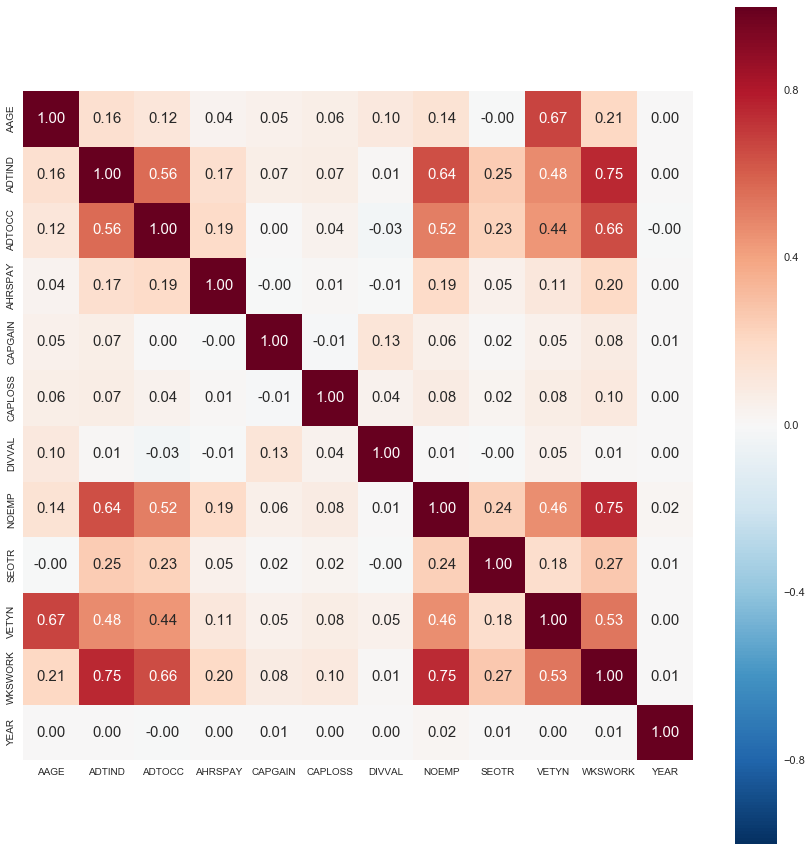

In [22]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, fmt='.2f', annot_kws={"size": 15})
plt.show()
plt.close(fig)

We can observe that some variables have a relationship :
    - AAGE-VETYN
    - ADTIND-NOEMP
    - ADTIND-WKSWORK
    - ADTOCC-WKSWORK
    - NOEMP-WKSWORK 
    - ...
Given these correlations, it would not be surprising if the number of variables remaining in the model were very small.

# Part III : Data preprocessing 

## Part III.1 : Handle missing values 

When we analyzed the categorical variables, we noticed some missing data noted as ' ?'. We can first try to find these observations and then we will decide what to do with these incomplete observations.
Regarding the numerical values, we don't know if we have missing values. We will first look at these features then handle the missing catergorial values.

In [23]:
trainset.count(), testset.count()

(AAGE        199521
 ACLSWKR     199521
 ADTIND      199521
 ADTOCC      199521
 AHGA        199521
 AHRSPAY     199521
 AHSCOL      199521
 AMARITL     199521
 AMJIND      199521
 AMJOCC      199521
 ARACE       199521
 AREORGN     199521
 ASEX        199521
 AUNMEM      199521
 AUNTYPE     199521
 AWKSTAT     199521
 CAPGAIN     199521
 CAPLOSS     199521
 DIVVAL      199521
 FILESTAT    199521
 GRINREG     199521
 GRINST      199521
 HHDFMX      199521
 HHDREL      199521
 MIGMTR1     199521
 MIGMTR3     199521
 MIGMTR4     199521
 MIGSAME     199521
 MIGSUN      199521
 NOEMP       199521
 PARENT      199521
 PEFNTVTY    199521
 PEMNTVTY    199521
 PENATVTY    199521
 PRCITSHP    199521
 SEOTR       199521
 VETQVA      199521
 VETYN       199521
 WKSWORK     199521
 YEAR        199521
 WAGE        199521
 dtype: int64, AAGE        99760
 ACLSWKR     99760
 ADTIND      99760
 ADTOCC      99760
 AHGA        99760
 AHRSPAY     99760
 AHSCOL      99760
 AMARITL     99760
 AMJIND      9

If we are just looking at this result, we don't have anything missing in any column (continuous and categorical variables). 
However, we already know that we have missing catergorial values. For each column, we are going to display the number of observations with a missing data.

In [24]:
def find_missing_data(df):
    for i, col in enumerate(df.columns[:]):
        if df.dtypes[i] == 'object':
            n_counts = df[col].value_counts()
            if ' ?' in n_counts.keys(): 
                print col, n_counts[' ?']

In [25]:
print 'Missing values of the trainset : \n', find_missing_data(trainset), '\n'
print 'Missing values of the testset : \n', find_missing_data(testset), '\n'

Missing values of the trainset : 
GRINST 708
MIGMTR1 99695
MIGMTR3 99695
MIGMTR4 99695
MIGSUN 99695
PEFNTVTY 6713
PEMNTVTY 6119
PENATVTY 3393
None 

Missing values of the testset : 
GRINST 330
MIGMTR1 49944
MIGMTR3 49944
MIGMTR4 49944
MIGSUN 49944
PEFNTVTY 3429
PEMNTVTY 3072
PENATVTY 1764
None 



First, we can see that we have missing values in the same columns in the trainset and testset. We can then handle the missing data in both sets.

Since the features MIGMTR1, MIGMTR3, MIGMTR4 and MIGSUN are missing 99695 values (which represents half of the dataset), we are going to remove these columns from the datasets.

We then choose to remove the persons with missing values, instead of removing the columns GRINST, PEFNTVTY, PEMNTVTY, and PENATVTY which could be be influent variables.

In [26]:
def handle_missing_data(df):
    sel_col = []
    sel_row = []
    for i, col in enumerate(df.columns[:]):    
        if df.dtypes[i] == 'object':
            n_counts = df[col].value_counts()
            if ' ?' in n_counts.keys() :
                if n_counts[' ?'] > 0.4 * len(df):
                    sel_col.append(col)
                else :
                    sel_row += df.loc[df[col] == ' ?'].index.tolist()
    df.drop(sel_col, axis=1, inplace=True)
    df.drop(df.index[list(set(sel_row))], axis=0, inplace=True)

In [27]:
handle_missing_data(trainset)
handle_missing_data(testset)

In [28]:
print 'Missing values of the trainset : \n', find_missing_data(trainset), '\n'
print 'Missing values of the testset : \n', find_missing_data(testset), '\n'

Missing values of the trainset : 
None 

Missing values of the testset : 
None 



In [29]:
print 'There are %d observations in the trainset for %d variables.' %(trainset.shape[0], trainset.shape[1])

There are 190559 observations in the trainset for 37 variables.


## Part III.2 : Feature engineering

We have to convert the categorical features into variables that machine learning model can understand.

But first, for some features, we can group some classes into categories in order to reduce the number of distinctive values. 

### Group the education

In [30]:
pd.unique(trainset.AHGA)

array([' 10th grade', ' Children', ' Some college but no degree',
       ' Bachelors degree(BA AB BS)', ' High school graduate',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' 9th grade', ' 1st 2nd 3rd or 4th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

In [31]:
def group_educ(df):
    educ = []
    for ed in df['AHGA']:
        if ed in [' Children', ' Less than 1st grade']:
            educ.append('Children')
        elif ed in [' 5th or 6th grade', ' 7th and 8th grade']:
            educ.append('Sec_school')
        elif ed in [' 9th grade', ' 10th grade', ' 11th grade', ' 12th grade no diploma', \
                    ' High school graduate']:
            educ.append('High_school')
        elif ed in [' Bachelors degree(BA AB BS)', ' Associates degree-occup /vocational', \
                    ' Associates degree-academic program'] :
            educ.append('Undergraduate')
        elif ed == ' Some college but no degree':
            educ.append('Coll_noDeg')
        else :
            educ.append('Graduate')
    return educ

In [32]:
trainset.insert(4, 'AEDUC', str)
testset.insert(4, 'AEDUC', str)

trainset['AEDUC'] = group_educ(trainset)
testset['AEDUC'] = group_educ(testset)

trainset.drop(['AHGA'], axis=1, inplace=True)
testset.drop(['AHGA'], axis=1, inplace=True)

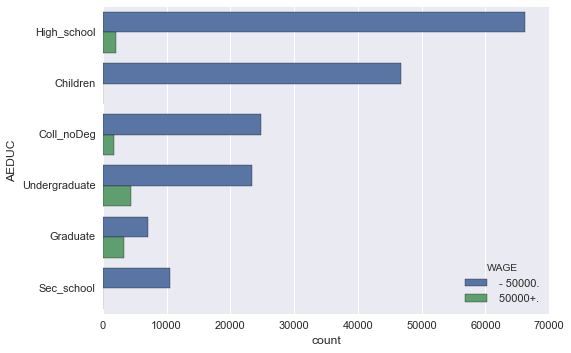

In [33]:
# Display the new distribution :
sns.countplot(y='AEDUC', hue='WAGE', data=trainset, )
sns.plt.show()

### Group the country of birth

We can first suppose that the country of birth parents are not relevant. However, we can suppose that the country of birth of the person is influent. Since this feature has many countries, we can group them into continents.

In [34]:
pd.unique(trainset['PENATVTY'])

array([' Vietnam', ' United-States', ' Columbia', ' Mexico', ' Peru',
       ' Cuba', ' Philippines', ' Dominican-Republic', ' El-Salvador',
       ' Canada', ' Scotland', ' Portugal', ' Guatemala', ' Ecuador',
       ' Germany', ' Puerto-Rico', ' Italy', ' China', ' Poland',
       ' Nicaragua', ' Taiwan', ' England', ' Ireland', ' South Korea',
       ' Trinadad&Tobago', ' Jamaica', ' Honduras', ' Iran', ' Hungary',
       ' France', ' Cambodia', ' India', ' Hong Kong', ' Japan', ' Haiti',
       ' Holand-Netherlands', ' Greece', ' Thailand', ' Panama',
       ' Yugoslavia', ' Laos', ' Outlying-U S (Guam USVI etc)'], dtype=object)

In [35]:
def group_country(df):
    country_list = []
    for country in df['PENATVTY']:
        if country in [' United-States', ' Outlying-U S (Guam USVI etc)', ' Canada', ' Mexico'] :
            country_list.append('NorthAm')
        elif country in [' Puerto-Rico', ' Peru', ' Haiti', ' El-Salvador', ' Dominican-Republic', \
                         ' Columbia', ' Cuba', ' Panama', ' Honduras', ' Ecuador', ' Guatemala',    \
                         ' Nicaragua', ' Jamaica', ' Trinadad&Tobago']:
            country_list.append('SouthAm')
        elif country in [' Portugal', ' England', ' Germany', ' Italy', ' Hungary', ' Poland', \
                         ' Holand-Netherlands', ' France', ' Scotland', ' Yugoslavia', ' Greece',\
                         ' Ireland'] :
            country_list.append('Europe')
        elif country in [' South Korea', ' India', ' Japan', ' Thailand', ' Laos', ' China', \
                         ' Vietnam', ' Philippines', ' Iran', ' Taiwan', ' Hong Kong', \
                         ' Cambodia'] :
            country_list.append('Asia')
    return country_list

In [36]:
trainset.insert(trainset.shape[1]-1, 'COUNTRY', str)
testset.insert(testset.shape[1]-1, 'COUNTRY', str)

trainset['COUNTRY'] = group_country(trainset)
testset['COUNTRY'] = group_country(testset)

trainset.drop(['PENATVTY'], axis=1, inplace=True)
testset.drop(['PENATVTY'], axis=1, inplace=True)

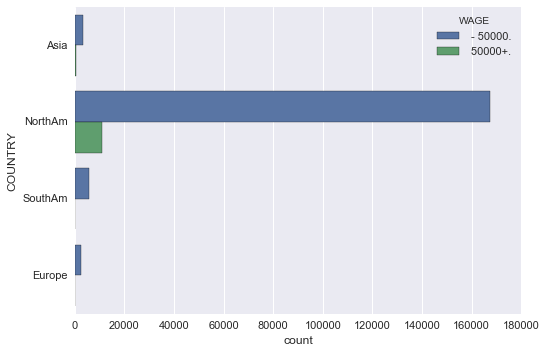

In [37]:
# Display the new distribution :
sns.countplot(y='COUNTRY', hue='WAGE', data=trainset, )
sns.plt.show()

In [38]:
print 'There are %d observations in the trainset for %d variables.' %(trainset.shape[0], trainset.shape[1])

There are 190559 observations in the trainset for 37 variables.


### Feature selection 

Since we have a large number of features (including some nominal variables with several classes), we are going to choose some relevant features.

According to the previous data discovery part, we are going to suppose that these features are not relevant and we are going to keep the following ones : AAGE, AEDUC, AMARILTL, ASEX, CAPGAIN, CAPLOSS, DIVVAL, PRCITSHP, VETYN, WKSWORK, COUNTRY.

In [39]:
sel_col_drop = ['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHRSPAY', 'AHSCOL', 'AMJIND', 'AMJOCC', \
                'AREORGN', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', \
                'HHDFMX', 'HHDREL', 'NOEMP','PARENT', 'PEFNTVTY', 'PEMNTVTY', 'SEOTR', \
                'VETQVA', 'YEAR']

In [40]:
trainset.drop(sel_col_drop, axis=1, inplace=True)
testset.drop(sel_col_drop, axis=1, inplace=True)

In [41]:
trainset.shape, testset.shape

((190559, 14), (95216, 14))

### Convert into dummy variables

Our categorical variables cannot be understood by machine learning algorithms so we first have to convert them into dummy variables.

In [42]:
def annual_wage(df):
    wage = []
    for w in df['WAGE']:
        if w == ' - 50000.':
            wage.append(0)
        else:
            wage.append(1)
    return wage

In [43]:
trainset.insert(0, 'WAGE_ANN', int)
testset.insert(0, 'WAGE_ANN', int)

In [44]:
trainset['WAGE_ANN'] = annual_wage(trainset)
testset['WAGE_ANN'] = annual_wage(testset)

In [45]:
trainset.drop(['WAGE'], axis=1, inplace=True)
testset.drop(['WAGE'], axis=1, inplace=True)

In [46]:
def dummy_variables(df):
    df_type = df.dtypes
    for col in df_type.keys():
        if df_type[col] == 'object':
            df = pd.concat([df, pd.get_dummies(df[col]).rename(columns=lambda x: col + '_' + str(x))], axis=1)
            df.drop([col], axis=1, inplace=True)
    return df

In [47]:
trainset_ = dummy_variables(trainset)
testset_ = dummy_variables(testset)

In [48]:
print 'There are %d observations in the trainset for %d variables.' %(trainset_.shape[0], trainset_.shape[1])

There are 190559 observations in the trainset for 39 variables.


In [49]:
trainset_.shape, testset_.shape

((190559, 39), (95216, 39))

In [50]:
# We notice that testset_ has 322 columns and trainset_ 323. Let's check if we have the same columns and 
# which column is missing.
missing_col = list(set(trainset_.columns) - set(testset_.columns))

In [51]:
missing_col

[]

In [52]:
for i in missing_col:
    testset_.insert(testset_.shape[1] - 1, i, int)
    testset_[i] = [0]*len(testset_)

In [53]:
trainset_.head()

,WAGE_ANN,AAGE,CAPGAIN,CAPLOSS,DIVVAL,VETYN,WKSWORK,AEDUC_Children,AEDUC_Coll_noDeg,AEDUC_Graduate,...,MIGSAME_ Yes,PRCITSHP_ Foreign born- Not a citizen of U S,PRCITSHP_ Foreign born- U S citizen by naturalization,PRCITSHP_ Native- Born abroad of American Parent(s),PRCITSHP_ Native- Born in Puerto Rico or U S Outlying,PRCITSHP_ Native- Born in the United States,COUNTRY_Asia,COUNTRY_Europe,COUNTRY_NorthAm,COUNTRY_SouthAm
0,0,18,0,0,0,2,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,9,0,0,0,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,10,0,0,0,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,48,0,0,0,2,52,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,42,5178,0,0,2,52,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#  Part IV : Machine Learning Algorithms

Since we are going to compare some algorithms, we are going to split the trainset into a smaller trainset and a validation set. This split allows to train the classifier using 'trainset', tune the parameters using 'validation set' and then test the performance of our classifier on unseen 'testset'. 

## Part IV.1 : Split the data

In [54]:
trainset_.reset_index(inplace=True)
testset_.reset_index(inplace=True)

In [55]:
trainset_.drop(['index'], axis=1, inplace=True)
testset_.drop(['index'], axis=1, inplace=True)

In [56]:
X = trainset_.iloc[:,1:]
Y = trainset_['WAGE_ANN']

In [57]:
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size=0.20, random_state=100)

In [58]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((152447, 38), (38112, 38), (152447,), (38112,))

## Part IV.2 : Try several algorithms with cross-validation

### Logistic Regression model

In [59]:
logregCV = linear_model.LogisticRegressionCV()
logregCV.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [60]:
Y_pred = logregCV.predict(X_val)

In [61]:
print 'Accuracy score : %.3f' %(logregCV.score(X_val, Y_val))
print 'Prediction error : %.3f \n' %(1 - logregCV.score(X_val, Y_val))

print 'Precision score : %.3f' %(metrics.precision_score(Y_val, Y_pred))
print 'Recall score : %.3f' %(metrics.recall_score(Y_val, Y_pred))
print 'F1-score : %.3f' %(metrics.f1_score(Y_val, Y_pred))
print 'ROC AUC : %.3f' %(metrics.roc_auc_score(Y_val, Y_pred))

Accuracy score : 0.948
Prediction error : 0.052 

Precision score : 0.702
Recall score : 0.277
F1-score : 0.397
ROC AUC : 0.635


#### Plot the ROC curve

In [62]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_val, Y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

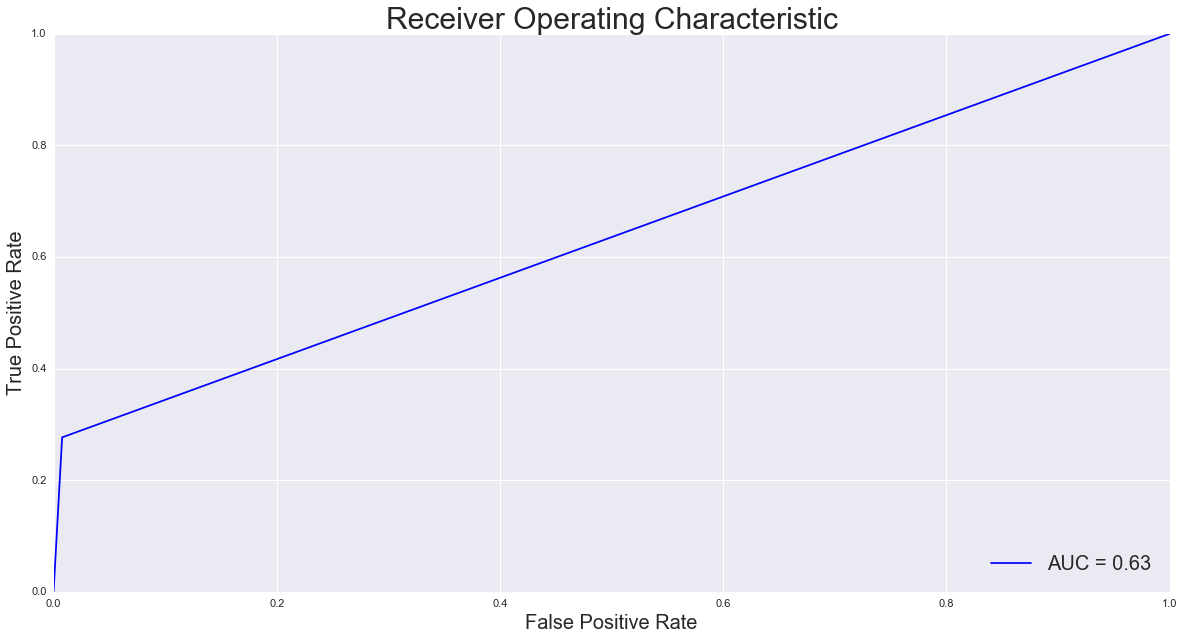

In [67]:
fig = plt.figure(figsize=(20,10))

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic', fontsize=30)
plt.legend(loc='lower right',fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

plt.close(fig)

We can see that we obtain a good accuracy. However, as we have said before, the dataset is unbalance and we already knew that we would have a good accuracy. We then choose 4 other metrics and we can clearly see that this model is not sufficient.

### Random Forests model

Let's cross-validate this model by looking at the optimal max_features parameter.

In [68]:
ROC_AUC_CV = []

for i in range(X_train.shape[1]):
    rf = RandomForestClassifier(max_features=i+1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_val)
    ROC_AUC_CV.append(metrics.roc_auc_score(Y_val, Y_pred))

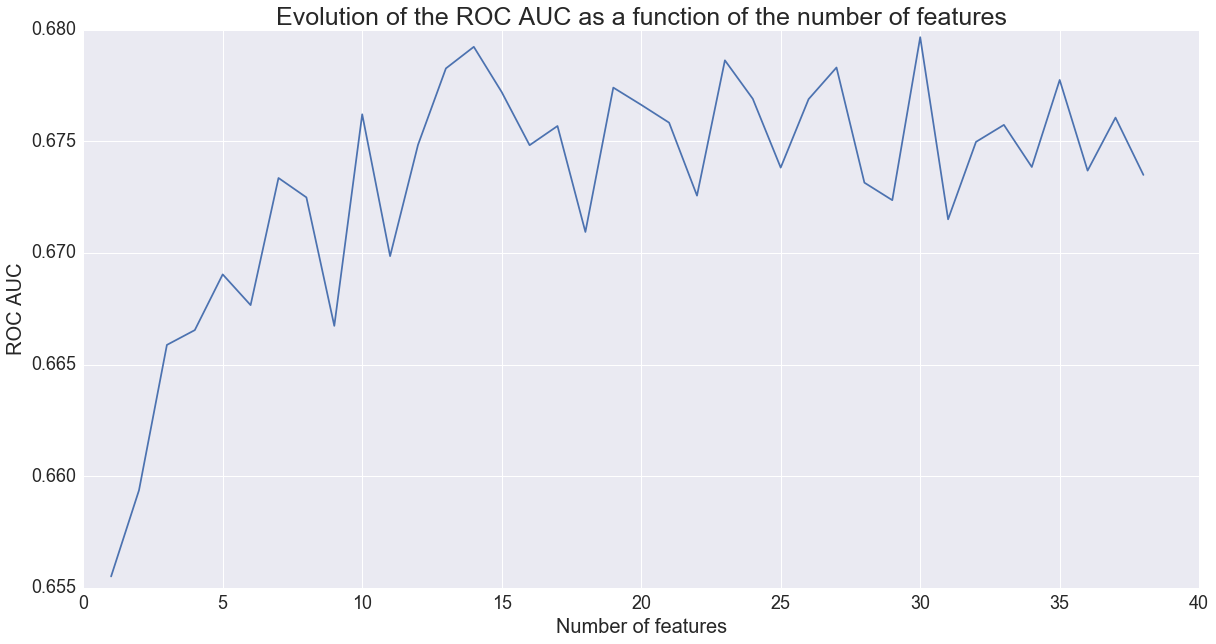

In [69]:
fig = plt.figure(figsize=(20,10))
plt.plot(range(1, X_train.shape[1]+1), ROC_AUC_CV)

plt.title('Evolution of the ROC AUC as a function of the number of features', fontsize = 25)

plt.xlabel('Number of features', fontsize=20)
plt.ylabel('ROC AUC', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

plt.close(fig)

We now use the Random Forest Classifier with the optimal parameter.

In [70]:
optimal_param = np.argmax(ROC_AUC_CV) + 1

In [71]:
rf = RandomForestClassifier(max_features=optimal_param)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=30, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [72]:
Y_pred = rf.predict(X_val)

In [73]:
print 'Accuracy score : %.3f' %(rf.score(X_val, Y_val))
print 'Prediction error : %.3f \n' %(1 - rf.score(X_val, Y_val))

print 'Precision score : %.3f' %(metrics.precision_score(Y_val, Y_pred))
print 'Recall score : %.3f' %(metrics.recall_score(Y_val, Y_pred))
print 'F1-score : %.3f' %(metrics.f1_score(Y_val, Y_pred))
print 'ROC AUC : %.3f' %(metrics.roc_auc_score(Y_val, Y_pred))

Accuracy score : 0.945
Prediction error : 0.055 

Precision score : 0.579
Recall score : 0.365
F1-score : 0.448
ROC AUC : 0.674


#### Plot the ROC curve

In [74]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_val, Y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

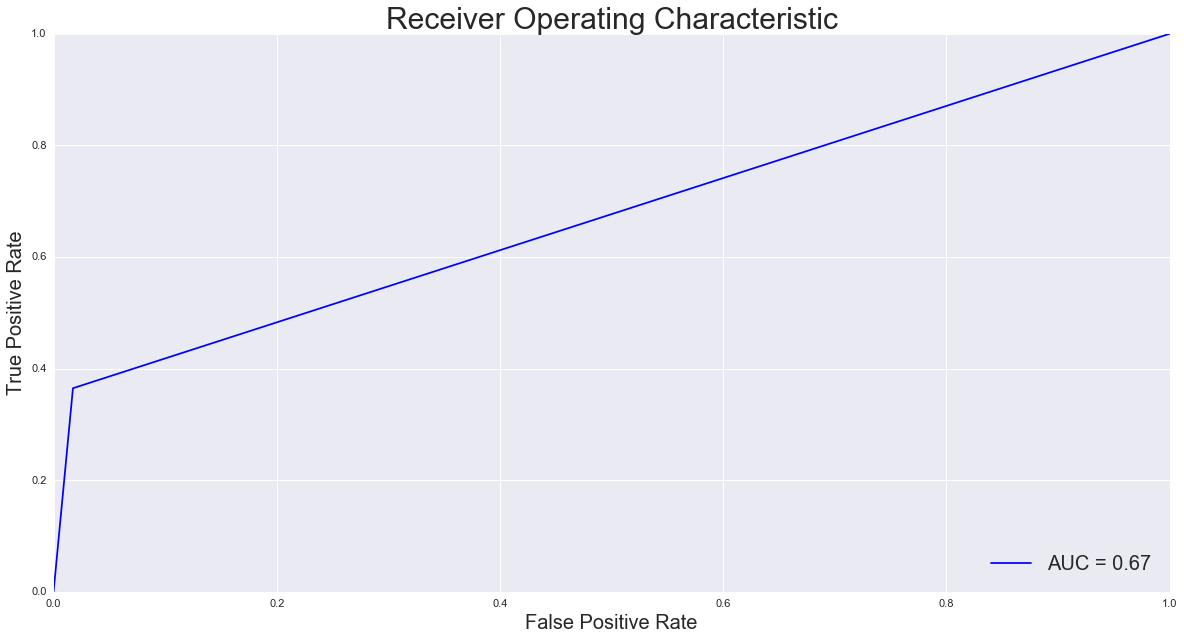

In [75]:
fig = plt.figure(figsize=(20,10))

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic', fontsize=30)
plt.legend(loc='lower right',fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

plt.close(fig)

##### Display the most important features for our prediction model. 

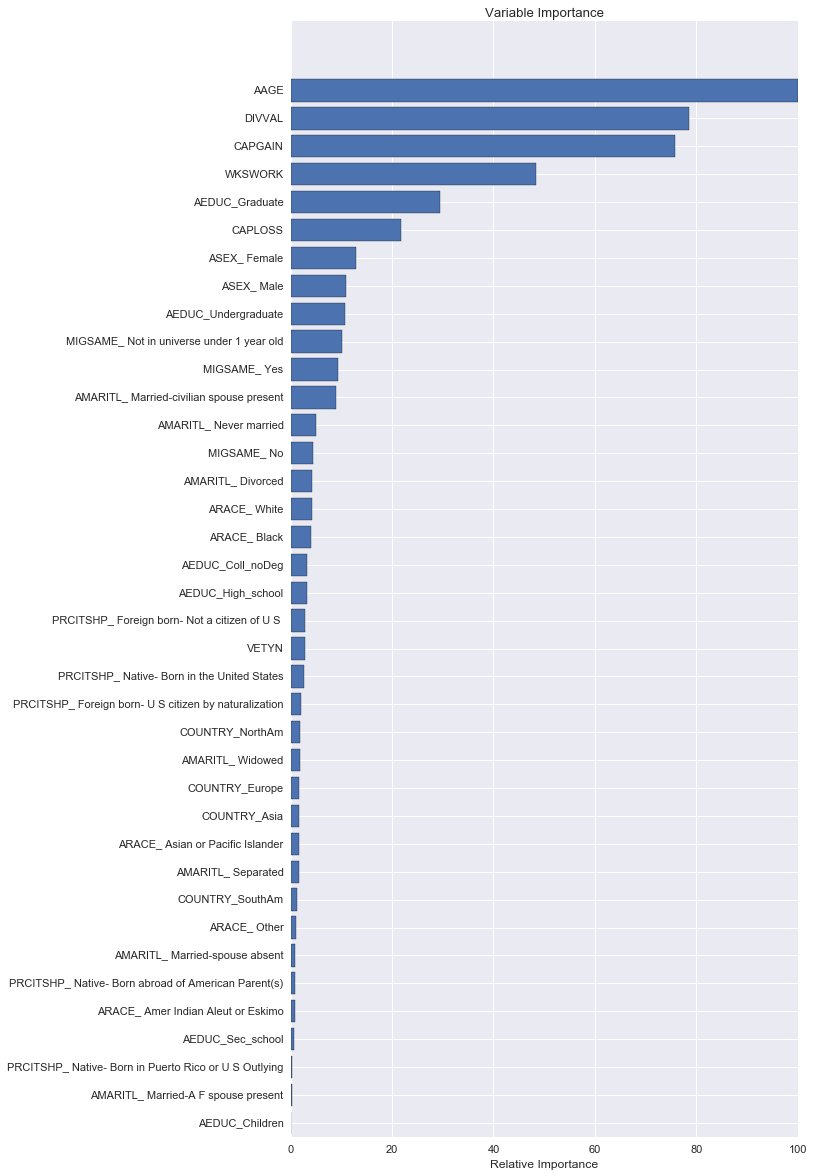

In [76]:
feat = rf.feature_importances_

fig = plt.figure(figsize=(20, 20))
# make importances relative to max importance
feature_importance = 100.0 * (feat / feat.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, pd.Series(X_train.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.close(fig)

### Ridge model

We can also try another algorithm which performs a feature selection.

In [77]:
ridge = linear_model.RidgeClassifierCV()
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_val)

In [78]:
print 'Accuracy score : %.3f' %(ridge.score(X_val, Y_val))
print 'Prediction error : %.3f \n' %(1-ridge.score(X_val, Y_val))

print 'Precision score : %.3f' %(metrics.precision_score(Y_val, Y_pred))
print 'Recall score : %.3f' %(metrics.recall_score(Y_val, Y_pred))
print 'F1-score : %.3f' %(metrics.f1_score(Y_val, Y_pred))
print 'ROC AUC : %.3f' %(metrics.roc_auc_score(Y_val, Y_pred))

Accuracy score : 0.943
Prediction error : 0.057 

Precision score : 0.884
Recall score : 0.081
F1-score : 0.149
ROC AUC : 0.540


#### Plot the ROC curve

In [79]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_val, Y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

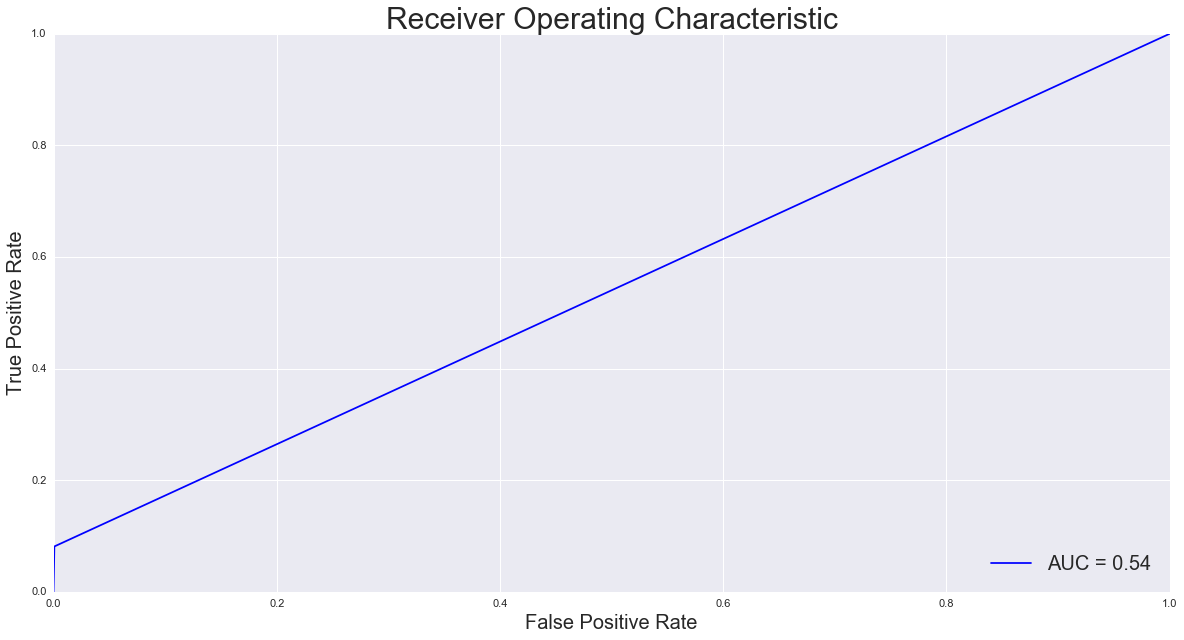

In [80]:
fig = plt.figure(figsize=(20,10))

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic', fontsize=30)
plt.legend(loc='lower right',fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

plt.close(fig)

We can also display the feature selection.

In [81]:
coef = sorted(zip(map(abs,ridge.coef_[0]), X_train.columns), key=lambda x: x[0])
coef_sorted = zip(*coef)

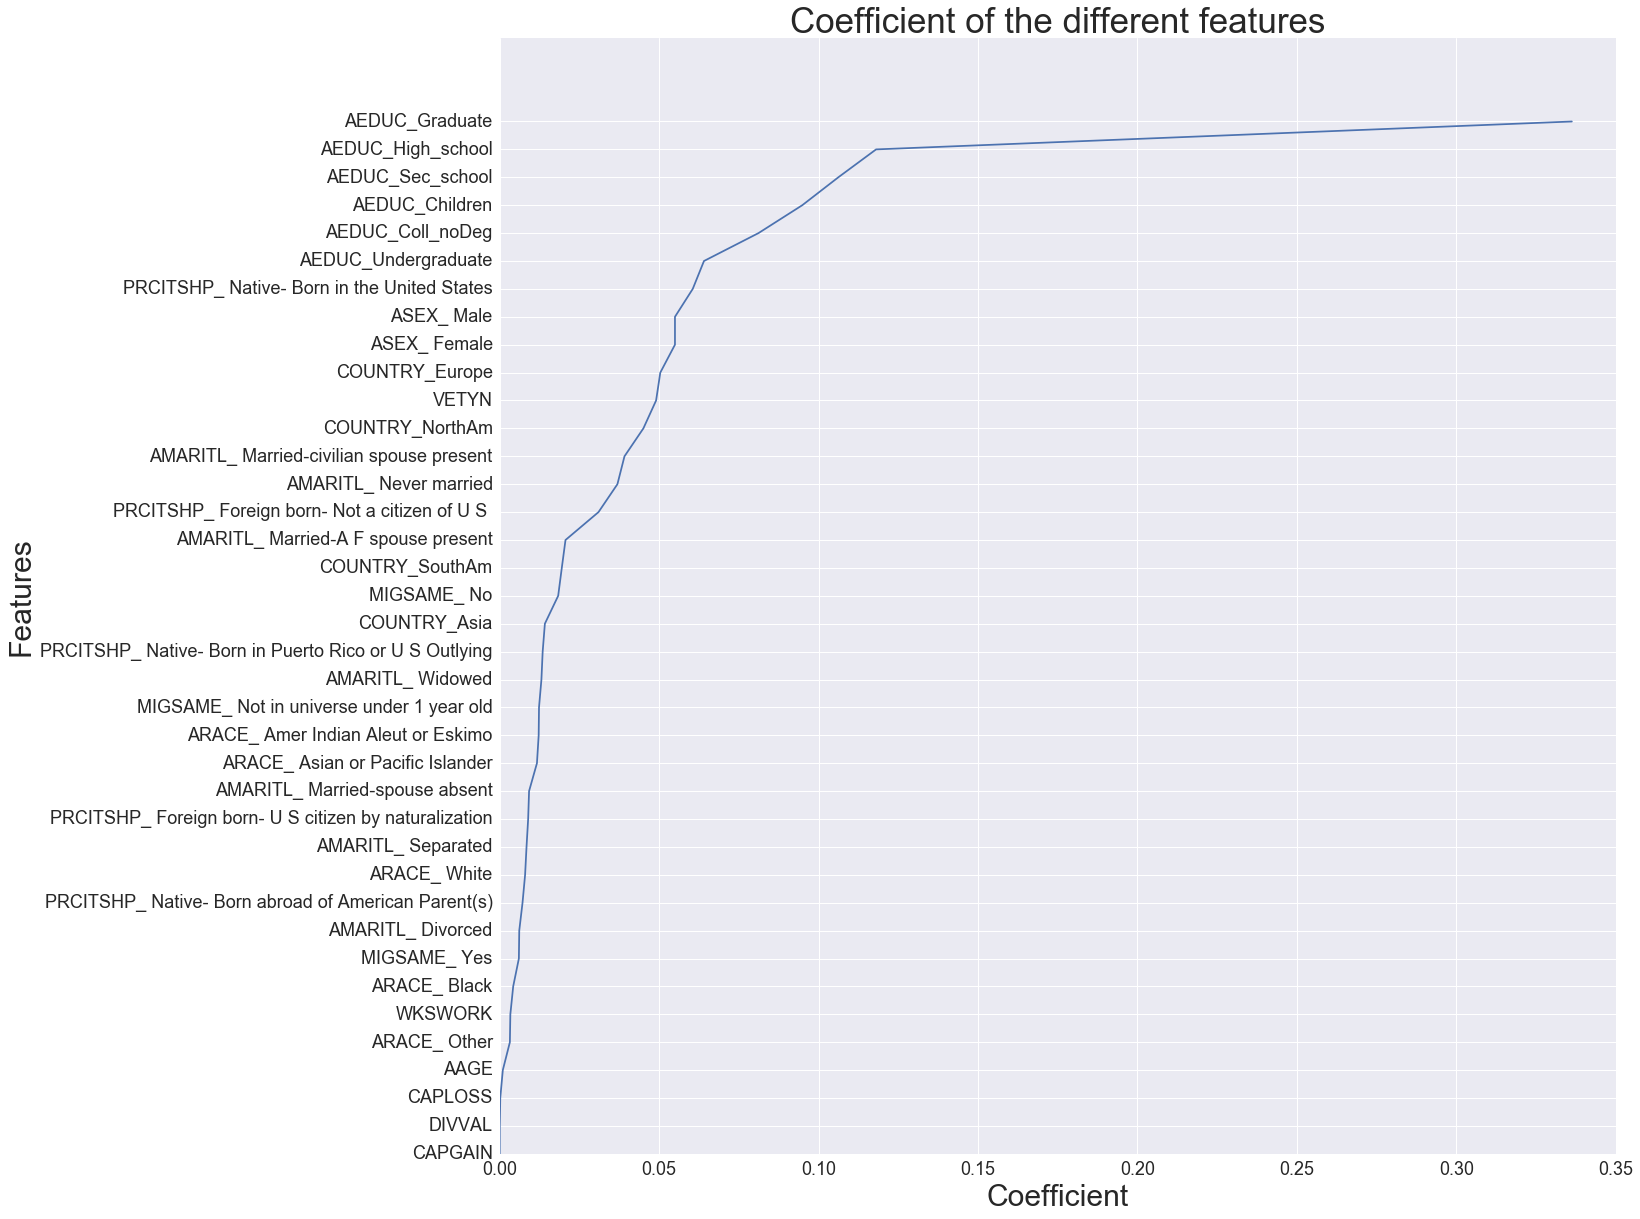

In [82]:
fig = plt.figure(figsize=(20,20))
plt.plot(coef_sorted[0], range(len(coef_sorted[0])))

plt.title('Coefficient of the different features', fontsize = 35)

plt.xlabel('Coefficient', fontsize=30)
plt.ylabel('Features', fontsize=30)

plt.yticks(range(len(coef_sorted[0])), coef_sorted[1])

plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

plt.close(fig)

### Results 

As we expected, all models give a high accuracy which is caused by the imbalanced nature of the trainset. So we decided to measure the performance of the models by using different metrics : precision, recall, F1-score and ROC AUC. These metrics show that Random Forests give the best result so we will keep this model.

Note that we could still improve the performance of this model by tuning every parameters of the Random Forests classifier like we have done for the max_features parameter, to get a higher ROC AUC

Regarding the feature selections in the last two models, we can see that the relative importance is not the same. Indeed, the Random Forests seems to focus more on the AAGE feature for example, while Ridge focuses more on the AEDUC feature. However, these two features are actually related, which can explain why they are in a opposite position on the graphs.

## Part IV.3 : Test the chosen model

In [83]:
X_test = testset_.iloc[:,1:]
Y_test = testset_['WAGE_ANN']

In [84]:
model_prediction = rf

In [85]:
Y_pred = model_prediction.predict(X_test)

In [86]:
print 'Accuracy score : %.3f' %(model_prediction.score(X_test, Y_))
print 'Prediction error : %.3f \n' %(1-model_prediction.score(X_test, Y_test))

print 'Precision score : %.3f' %(metrics.precision_score(Y_test, Y_pred))
print 'Recall score : %.3f' %(metrics.recall_score(Y_test, Y_pred))
print 'F1-score : %.3f' %(metrics.f1_score(Y_test, Y_pred))
print 'ROC AUC : %.3f' %(metrics.roc_auc_score(Y_test, Y_pred))

NameError: name 'Y_' is not defined

#### Plot the ROC curve

In [ ]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

In [ ]:
fig = plt.figure(figsize=(20,10))

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic', fontsize=30)
plt.legend(loc='lower right',fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

plt.close(fig)

# Part V : Conclusion 

We could  from our analysis that in the US in 1994/1995, a white graduated man, native born in the USA, married, is more likely to make more than 50.000 dollars per year.

With the chosen model applied on the testset, we get the following results : 

    - Accuracy score    : 0.945
    - Prediction error  : 0.055 
    - Precision score   : 0.579
    - Recall score      : 0.374
    - F1-score          : 0.454
    - ROC AUC           : 0.678
    
It is obvious that we could improve our model, but our prediction error is quite competitive with these error rates :
   
    - C4.5             : 4.8%
    - C5.0		     : 4.7%
    - C5.0 rules	   : 4.7%
    - C5.0 boosting	: 4.6%
    - Naive-Bayes	  : 23.2%


We could also improve our model by applying a Principal Component Analysis before the machine learning algorithms in order to reduce the dimensionality.



The problems encountered during this analysis are multiple and we had to make a choice to handle them.

One of them is the large number of features incomprehensible. Indeed, before feature selection automatically, it is not easy to choose the relevant features if they are hard to understand. 

Another issue was deciding how to handle missing data. Since the features MIGMTR1, MIGMTR3, MIGMTR4 and MIGSUN were missing a large number of values, we decided to remove them. However, in the case of the other features, we could have chosen to give the average values according to the sex, age or job.

We could also talk about the imbalanced nature of the dataset. Is our method better than if we had oversampled or undersampled our datasets ?

Finally, the large number of distinctive values for each feature were not easy to tackle. We sometimes chose to group them by categories and sometimes to just remove the feature. These choices could be discussed.